# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [4]:
def f(x):
    return numpy.cos(x)
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''

You can use the following cell to check that your code works for scalar arguments:

In [7]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [8]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [9]:
def df_analytic(x):
    return -1*numpy.sin(x);

In [10]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [12]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [13]:
def backward_difference(f, x, dx):
    return (f(x)-f(x-dx))/dx;

In [14]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


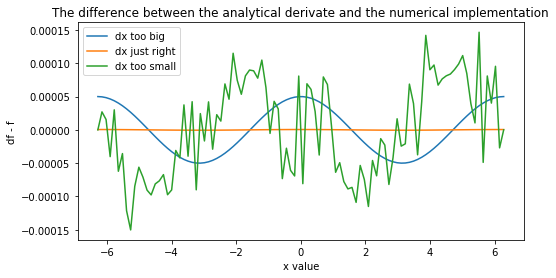

In [32]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.title("The difference between the analytical derivate and the numerical implementation")
plt.xlabel("x value")
plt.ylabel("df - f")
plt.plot(xs, df_dx_1 - df_dx_analytical, label = "dx too big")
plt.plot(xs, df_dx_2 - df_dx_analytical, label = "dx just right")
plt.plot(xs, df_dx_3 - df_dx_analytical, label = "dx too small")
plt.legend()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When dx is too small the curve has random peaks because python is only able to store up to 5 decimal places so dx is stored as 0, making the demoninator of the backward difference equation equal to 0 and therefore the backward difference value is not a real number. When dx is too big the calculated value for the backward difference deviates too far from the true value, so the backward difference calculated actually refers to the derivative at a different x-value. The offset between the numerical implementation and the x-value that the derivative is actually being calculated at for big dx is constant so this produces a smooth sinusoidal curve. 